In [1]:
import pandas as pd
import adult_data_functions as af
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
name_list = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
             "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
             "hours-per-week", "native-country", "income-label"]
categorical_colnames_list = ["workclass", "education", "occupation", "native-country"]
continuous_colnames_list = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

In [3]:
adult_train_dt = pd.read_csv("data/adult.data", names=name_list, na_values=[" ?"])
for col in categorical_colnames_list:
        adult_train_dt[col] = adult_train_dt[col].str.strip()

# Exploratory Analysis

In [4]:
adult_train_dt.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
adult_train_dt.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income-label         0
dtype: int64

In [6]:
missing_boolean = (adult_train_dt["workclass"].isna()) | (adult_train_dt["occupation"].isna()) | \
                  (adult_train_dt["native-country"].isna())
adult_train_dt.loc[missing_boolean]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-label
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [7]:
adult_train_dt.loc[adult_train_dt["native-country"].isna(), "income-label"].value_counts(normalize=True)

 <=50K    0.749571
 >50K     0.250429
Name: income-label, dtype: float64

In [8]:
adult_train_dt.loc[adult_train_dt["native-country"].isna(), "sex"].value_counts(normalize=True)

 Male      0.720412
 Female    0.279588
Name: sex, dtype: float64

In [9]:
# dropnas
adult_train_dt.dropna(inplace=True)

In [10]:
adult_train_dt.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income-label      0
dtype: int64

## Continuous features
`capital-gain` and `captial-loss` may be considered as categorical.

In [11]:
adult_train_dt.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
len(continuous_colnames_list)

6

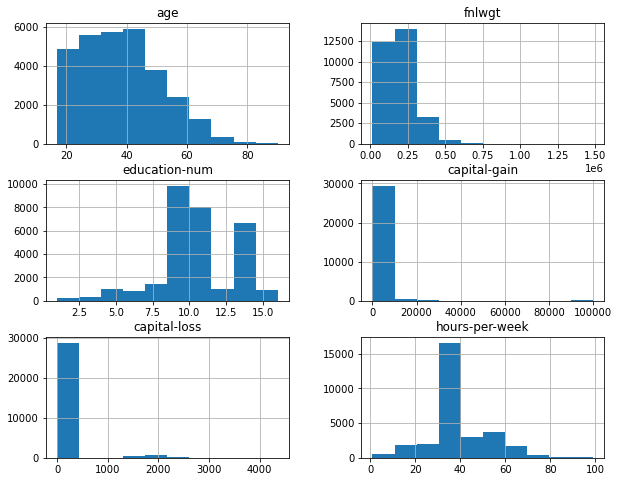

In [13]:
adult_train_dt[continuous_colnames_list].hist(figsize=(10, 8));

## Categorical Features

In [14]:
len(categorical_colnames_list)

4

In [15]:
adult_train_dt[categorical_colnames_list].nunique()

workclass          7
education         16
occupation        14
native-country    41
dtype: int64

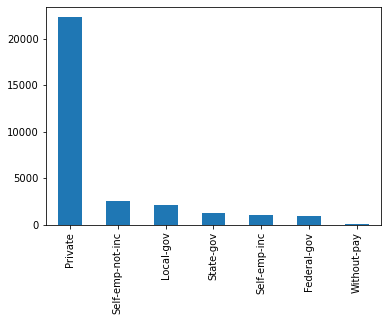

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64


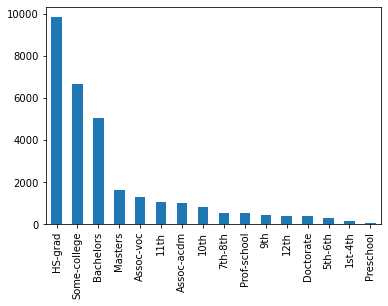

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64


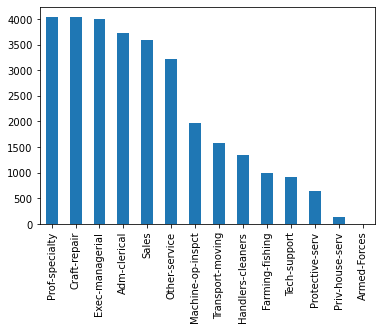

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64


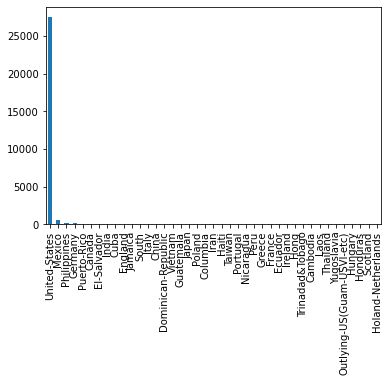

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Haiti                            42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

In [16]:
for col in categorical_colnames_list:
    adult_train_dt[col].value_counts().plot.bar()
    plt.show()
    print(adult_train_dt[col].value_counts())

<AxesSubplot:xlabel='education'>

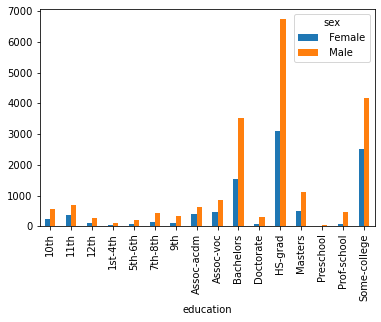

In [17]:
adult_train_dt[["education", "sex"]].value_counts().reset_index().pivot("education", "sex", 0).plot.bar()

<AxesSubplot:xlabel='education'>

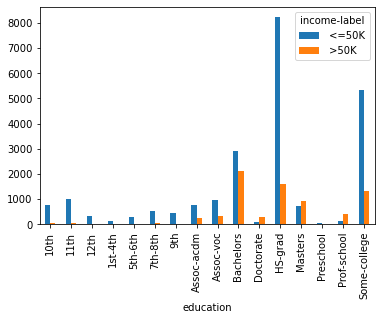

In [18]:
adult_train_dt[["education", "income-label"]].value_counts().reset_index().pivot("education", "income-label", 0).plot.bar()

<AxesSubplot:xlabel='native-country'>

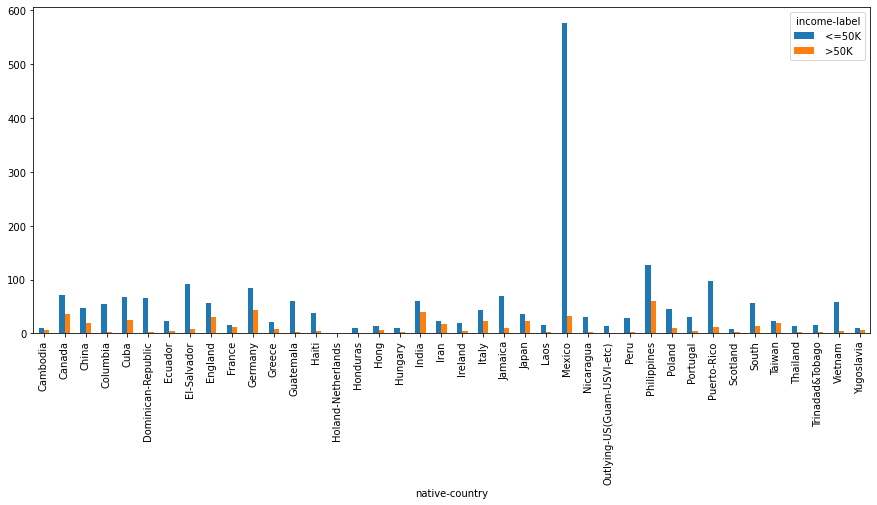

In [19]:
non_us_dt = adult_train_dt.loc[adult_train_dt["native-country"] != "United-States"]
non_us_dt[["native-country", "income-label"]].value_counts().reset_index().pivot("native-country", "income-label", 0).plot.bar(figsize=(15, 6))

## Labels

In [20]:
adult_train_dt["sex"].value_counts(normalize=True)

 Male      0.675685
 Female    0.324315
Name: sex, dtype: float64

In [21]:
adult_train_dt["income-label"].value_counts(normalize=True) 

 <=50K    0.751078
 >50K     0.248922
Name: income-label, dtype: float64

# Process Data

In [22]:
categorical_feature_encoder = preprocessing.OneHotEncoder()
sex_encoder = preprocessing.LabelEncoder() 
# race_encoder = preprocessing.LabelEncoder()
income_encoder = preprocessing.LabelEncoder()

In [23]:
merge_country_boolean=False
merge_education_boolean=False

In [24]:
train_data_dict = af.preprocess(adult_dt_path="data/adult.data", 
                                categorical_feature_encoder=categorical_feature_encoder, 
                                sex_encoder=sex_encoder,
                                income_encoder=income_encoder, encoder_fit_boolean=True,
                               merge_country_boolean=merge_country_boolean, 
                               merge_education_boolean=merge_education_boolean)

# Fit Naive Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, f1_score, recall_score, make_scorer
import numpy as np

In [26]:
# adult_test_dt = pd.read_csv("data/adult.test", names=name_list)
# adult_test_dt = adult_test_dt.loc[adult_test_dt["sex"].notna()]
# adult_test_dt["income-label"] = adult_test_dt["income-label"].apply(lambda x: x[:-1])
test_data_dict = af.preprocess(adult_dt_path="data/adult.test", 
                                categorical_feature_encoder=categorical_feature_encoder, 
                                sex_encoder=sex_encoder,
                                income_encoder=income_encoder, encoder_fit_boolean=False,
                               merge_country_boolean=merge_country_boolean, 
                               merge_education_boolean=merge_education_boolean)

In [27]:
logistic_x_train_mat = np.hstack([train_data_dict["categorical-features"].toarray(), 
                            train_data_dict["continuous-features"]])
logistic_x_test_mat = np.hstack([test_data_dict["categorical-features"].toarray(), 
                                  test_data_dict["continuous-features"]])

In [28]:
pd.Series(sex_encoder.inverse_transform(test_data_dict["sex"])).value_counts(normalize=True)

Male      0.673772
Female    0.326228
dtype: float64

In [29]:
pd.Series(income_encoder.inverse_transform(test_data_dict["income-label"])).value_counts(normalize=True)

<=50K    0.754316
>50K     0.245684
dtype: float64

## Income

In [30]:
naive_logistic_model = LogisticRegression(random_state=0)
naive_logistic_model.fit(X=logistic_x_train_mat, y=train_data_dict["income-label"])

LogisticRegression(random_state=0)

In [31]:
income_encoder.transform(["<=50K", '>50K'])

array([0, 1])

In [32]:
af.score_summary(y_pred=naive_logistic_model.predict(logistic_x_test_mat),
                 y_true=test_data_dict["income-label"], pos_label=1)

,accuracy,precision,recall,f1
0,0.792696,0.706429,0.267297,0.387843


In [33]:
af.score_summary(y_pred=naive_logistic_model.predict(logistic_x_test_mat),
                 y_true=test_data_dict["income-label"], pos_label=0)

,accuracy,precision,recall,f1
0,0.792696,0.801537,0.96382,0.87522


## Sex

In [34]:
naive_logistic_model = LogisticRegression(random_state=0)
naive_logistic_model.fit(X=logistic_x_train_mat, y=train_data_dict["sex"])

LogisticRegression(random_state=0)

In [35]:
sex_encoder.transform(["Male", "Female"])

array([1, 0])

In [36]:
af.score_summary(y_pred=naive_logistic_model.predict(logistic_x_test_mat),
                 y_true=test_data_dict["income-label"], pos_label=0)

/home/charles/anaconda3/envs/data_analysis/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,precision,recall,f1
0,0.245684,0.0,0.0,0.0


In [37]:
af.score_summary(y_pred=naive_logistic_model.predict(logistic_x_test_mat),
                 y_true=test_data_dict["income-label"], pos_label=1)

,accuracy,precision,recall,f1
0,0.245684,0.245684,1.0,0.394456


# Fit Ridge Logistic Regression

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## Income

In [39]:
# np.logspace(3, 8, 10)
scaler = StandardScaler()
logistic = LogisticRegression(max_iter=1000, random_state=0)

pipe = Pipeline(steps=[("scaler", scaler), ("logistic", logistic)])
param_grid = {
    "logistic__C": np.linspace(10**(-2), 10**(0), 50),
}

recall_scorer = make_scorer(recall_score, pos_label=1)

search = GridSearchCV(pipe, param_grid, n_jobs=18, scoring=recall_scorer)       
search.fit(X=logistic_x_train_mat, y=train_data_dict["income-label"])    

test_accuracy = search.score(X=logistic_x_test_mat, y=test_data_dict["income-label"])

print(f"best parameter: {search.best_params_}, cv score: {search.best_score_}")

best parameter: {'logistic__C': 0.333265306122449}, cv score: 0.44406081697864985


In [40]:
af.score_summary(y_pred=search.predict(logistic_x_test_mat), 
                 y_true=test_data_dict["income-label"], pos_label=1)

,accuracy,precision,recall,f1
0,0.814343,0.698769,0.429459,0.531972


In [41]:
af.score_summary(y_pred=search.predict(logistic_x_test_mat), 
                 y_true=test_data_dict["income-label"], pos_label=0)

,accuracy,precision,recall,f1
0,0.814343,0.834898,0.939701,0.884204


## Sex

In [42]:
recall_scorer = make_scorer(recall_score, pos_label=0)

search = GridSearchCV(pipe, param_grid, n_jobs=18, scoring=recall_scorer)       
search.fit(X=logistic_x_train_mat, y=train_data_dict["sex"])    

test_accuracy = search.score(X=logistic_x_test_mat, y=test_data_dict["sex"])

print(f"best parameter: {search.best_params_}, cv score: {search.best_score_}")

best parameter: {'logistic__C': 0.5555102040816327}, cv score: 0.4981576282716441


In [43]:
# female
af.score_summary(y_pred=search.predict(logistic_x_test_mat),
                 y_true=test_data_dict["sex"], pos_label=0)

,accuracy,precision,recall,f1
0,0.748539,0.653825,0.487075,0.558264


In [44]:
af.score_summary(y_pred=search.predict(logistic_x_test_mat),
                 y_true=test_data_dict["sex"], pos_label=1)

,accuracy,precision,recall,f1
0,0.748539,0.778947,0.875136,0.824245


# PCA

In [45]:
scaler = StandardScaler()
scaled_logistic_x_train_mat = scaler.fit_transform(logistic_x_train_mat)
scaled_logistic_x_test_mat = scaler.transform(logistic_x_test_mat)

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=scaled_logistic_x_train_mat.shape[1] - 5)
pca.fit(scaled_logistic_x_train_mat)

PCA(n_components=78)

In [47]:
np.cumsum(pca.explained_variance_ratio_)

array([0.03680221, 0.0622119 , 0.08496864, 0.1041647 , 0.12145463,
       0.13791102, 0.15352019, 0.16845225, 0.18311476, 0.19759463,
       0.21193145, 0.22574891, 0.23951814, 0.25307499, 0.26636597,
       0.27961721, 0.29279684, 0.30585196, 0.31886815, 0.33169221,
       0.34442515, 0.35706404, 0.36963518, 0.3821149 , 0.39452164,
       0.4068615 , 0.41915733, 0.43140783, 0.44365146, 0.45586222,
       0.46792834, 0.47998399, 0.49197554, 0.50394878, 0.51590354,
       0.52784101, 0.53977388, 0.55170283, 0.56362944, 0.57555246,
       0.58747483, 0.59939582, 0.611314  , 0.62322795, 0.63513862,
       0.64704055, 0.65893501, 0.67082211, 0.68269879, 0.69456143,
       0.70640171, 0.71823083, 0.73003654, 0.74181974, 0.75355796,
       0.76526939, 0.77695711, 0.78863592, 0.80024953, 0.81177859,
       0.82325102, 0.83469221, 0.84606107, 0.8573594 , 0.86846734,
       0.87943512, 0.89035167, 0.901208  , 0.91201619, 0.92254981,
       0.9329271 , 0.94311594, 0.9531208 , 0.96222685, 0.97090

In [48]:
pca_scaled_logistic_x_train_mat = pca.transform(scaled_logistic_x_train_mat)
pca_scaled_logistic_x_test_mat = pca.transform(scaled_logistic_x_test_mat)

In [49]:
np.linalg.cond(pca_scaled_logistic_x_train_mat)

2.2968463249628335

## Income

In [50]:
# np.logspace(3, 8, 10)
scaler = StandardScaler()
logistic = LogisticRegression(max_iter=1000, random_state=0)

pipe = Pipeline(steps=[("scaler", scaler), ("logistic", logistic)])
param_grid = {
    "logistic__C": np.linspace(10**(0), 10**(3), 50),
}

recall_scorer = make_scorer(recall_score, pos_label=1)

search = GridSearchCV(pipe, param_grid, n_jobs=18, scoring=recall_scorer)       
search.fit(X=pca_scaled_logistic_x_train_mat, y=train_data_dict["income-label"])    

test_accuracy = search.score(X=pca_scaled_logistic_x_test_mat, y=test_data_dict["income-label"])

print(f"best parameter: {search.best_params_}, cv score: {search.best_score_}")

best parameter: {'logistic__C': 164.10204081632654}, cv score: 0.4439276611863729


In [51]:
af.score_summary(y_pred=search.predict(pca_scaled_logistic_x_test_mat), 
                 y_true=test_data_dict["income-label"], pos_label=1)

,accuracy,precision,recall,f1
0,0.814542,0.699166,0.43027,0.532709


In [52]:
af.score_summary(y_pred=search.predict(pca_scaled_logistic_x_test_mat), 
                 y_true=test_data_dict["income-label"], pos_label=0)

,accuracy,precision,recall,f1
0,0.814542,0.835093,0.939701,0.884314


## Sex

In [53]:
# np.logspace(3, 8, 10)
scaler = StandardScaler()
logistic = LogisticRegression(max_iter=1000, random_state=0)

pipe = Pipeline(steps=[("scaler", scaler), ("logistic", logistic)])
param_grid = {
    "logistic__C": np.linspace(10**(0), 10**(3), 50),
}

recall_scorer = make_scorer(recall_score, pos_label=1)

search = GridSearchCV(pipe, param_grid, n_jobs=18, scoring=recall_scorer)       
search.fit(X=pca_scaled_logistic_x_train_mat, y=train_data_dict["sex"])    

test_accuracy = search.score(X=pca_scaled_logistic_x_test_mat, y=test_data_dict["sex"])

print(f"best parameter: {search.best_params_}, cv score: {search.best_score_}")

best parameter: {'logistic__C': 21.387755102040817}, cv score: 0.8745338567222767


In [54]:
af.score_summary(y_pred=search.predict(pca_scaled_logistic_x_test_mat), 
                 y_true=test_data_dict["sex"], pos_label=1)

,accuracy,precision,recall,f1
0,0.74741,0.776047,0.878683,0.824182


In [55]:
af.score_summary(y_pred=search.predict(pca_scaled_logistic_x_test_mat), 
                 y_true=test_data_dict["sex"], pos_label=0)

,accuracy,precision,recall,f1
0,0.74741,0.655279,0.476287,0.551627
